In [1]:
import data_load as dl
import dataset_creator as dc
import models
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import keras
import numpy as np
import time

C:\Users\Patrick\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [265]:
from keras.models import load_model
trained_model = load_model('deep_model.h5')

In [266]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [267]:
y_preds = trained_model.predict(X_test)
y_true = y_test

In [268]:
y_preds = y_preds/(np.max(abs(y_preds)))

In [269]:
y_true = y_true/(np.max(abs(y_true)))

<IPython.core.display.Javascript object>


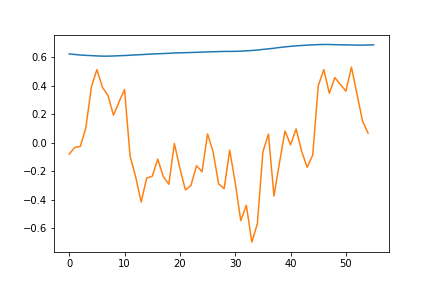

<IPython.core.display.Javascript object>


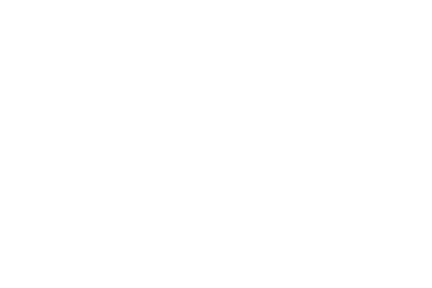

In [270]:
num = 232

y_true_sample = np.squeeze(y_true[num])
y_pred_sample = np.squeeze(y_preds[num])

%matplotlib inline
%matplotlib notebook

fig = plt.figure()
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,56):
    fig.clear()
    plt.plot(y_true_sample[0:56])
    plt.plot(y_pred_sample[0:i])
    #plt.xlim([0,60])
    #plt.ylim([1.8,2.3])
    fig.canvas.draw()
    time.sleep(0.001)

In [271]:
#Take unused run from dataset (2/27) and feed-forward. Concatenate segements.
# Compare with one from used data

In [272]:
path = r"C:\Users\Patrick\Datasets\sr\SR"
trial_paths = dl.combine_data(path)
trials = dl.generate_trial_objects(trial_paths[1:2])
processed_trials = dl.process_trial_data(trials)

In [273]:
def synch_streams(G2, G3, G4, G5, motion):
    G2 = G2[75:-75]
    G3 = G3[75:-75]
    G4 = G4[75:-75]
    G5 = G5[75:-75]
    
    new_motion = motion[0:-1:6]
    new_motion = motion[75:(75+2880)]
    
    return G2, G3, G4, G5, new_motion

def generate_segments(G2, G3, G4, G5, motion, output_downsample_factor=2):
    full_run_length = 2880
    indices = np.arange(0,(2877-112), 7)
    
    images_out = []
    motion_out = []
    
    for i in indices:
        G2_seg = G2[i:(i+112)]
        G3_seg = G3[i:(i+112)]
        G4_seg = G4[i:(i+112)]
        G5_seg = G5[i:(i+112)]
        motion_seg = motion[i:(i+112):output_downsample_factor]
        
        new_image = np.array([[G2_seg],[G3_seg],[G4_seg],[G5_seg]])
        
        images_out.append(new_image)
        
        motion_out.append(np.asarray(motion_seg))
        
    return images_out, motion_out

In [274]:
trial = processed_trials[0]

In [275]:
G2, G3, G4, G5, motion = synch_streams(trial.G2_AVG, trial.G3_AVG, trial.G4_AVG, trial.G5_AVG, trial.Motion_Conv)
images, motion = generate_segments(G2, G3, G4, G5, motion)

In [276]:
len(motion)

395

In [277]:
GCaMP_data = []
motion_data = []

GCaMP_max = 0
motion_max = 0

for i in range(395):
    new_image = np.reshape(images[i], (1,1,112,4))
    new_motion = np.reshape(motion[i], (1,1,56,1))
    
    GCaMP_data.append(new_image)
    motion_data.append(new_motion)
    
    if np.max(abs(new_image))>GCaMP_max:
        GCaMP_max = np.max(abs(new_image))
    
    if np.max(abs(new_motion))>motion_max:
        motion_max = np.max(abs(new_motion))

In [278]:
for i in range(395):
    GCaMP_data[i] = GCaMP_data[i]/GCaMP_max

In [279]:
predictions=[]
trues = []

for i in range(395):
    prediction = trained_model.predict(GCaMP_data[i])
    predictions.append(np.squeeze(prediction))
    trues.append(np.squeeze(motion_data[i]/motion_max))
    #test_true_pairs.append([prediction, true, i])

In [280]:
len(trues)

395

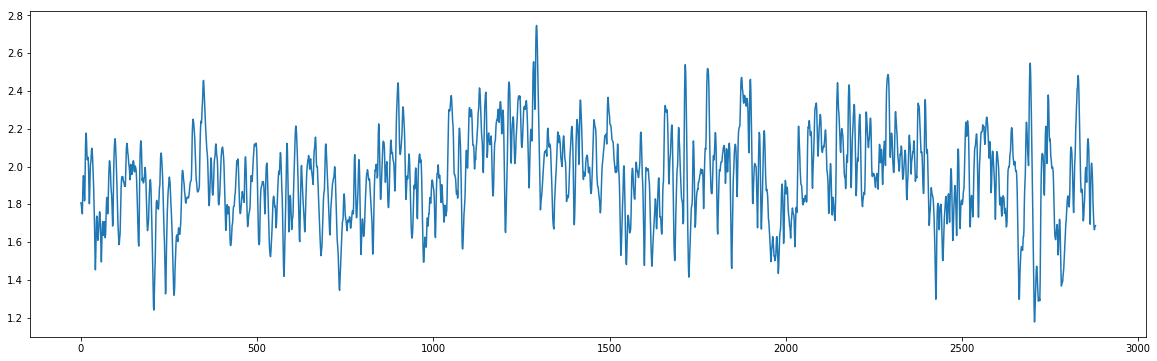

In [281]:
%matplotlib inline
plt.figure(figsize=(20,6))
sample_motion = trial.Motion_Conv[0:-1:6]
sample_motion = sample_motion[75:(75+2880)]
plt.plot(sample_motion)

In [282]:
#Need to unroll predictions and motion data.
#Each sample is 56 units long
#A new sample is made every 7 points
indices = np.arange(0,(2877-112), 7)

In [283]:
indices

array([   0,    7,   14,   21,   28,   35,   42,   49,   56,   63,   70,
         77,   84,   91,   98,  105,  112,  119,  126,  133,  140,  147,
        154,  161,  168,  175,  182,  189,  196,  203,  210,  217,  224,
        231,  238,  245,  252,  259,  266,  273,  280,  287,  294,  301,
        308,  315,  322,  329,  336,  343,  350,  357,  364,  371,  378,
        385,  392,  399,  406,  413,  420,  427,  434,  441,  448,  455,
        462,  469,  476,  483,  490,  497,  504,  511,  518,  525,  532,
        539,  546,  553,  560,  567,  574,  581,  588,  595,  602,  609,
        616,  623,  630,  637,  644,  651,  658,  665,  672,  679,  686,
        693,  700,  707,  714,  721,  728,  735,  742,  749,  756,  763,
        770,  777,  784,  791,  798,  805,  812,  819,  826,  833,  840,
        847,  854,  861,  868,  875,  882,  889,  896,  903,  910,  917,
        924,  931,  938,  945,  952,  959,  966,  973,  980,  987,  994,
       1001, 1008, 1015, 1022, 1029, 1036, 1043, 10

In [284]:
true_dict = {}
pre_dict = {}

In [285]:
for i in indices:
    for j in range(56):
        current_val = i+j
        
        if current_val in pre_dict:
            pre_dict[current_val].append(predictions[int(i/7)][j])
        else:
            pre_dict[current_val] = [predictions[int(i/7)][j]]
        
        if current_val in true_dict:
            true_dict[current_val].append(trues[int(i/7)][j])
        else:
            true_dict[current_val] = [trues[int(i/7)][j]]

In [286]:
for key, value in pre_dict.items():
    pre_dict[key] = sum(value)/len(value)

In [287]:
for key, value in true_dict.items():
    true_dict[key] = sum(value)/len(value)

In [288]:
predict_list= []
true_list = []

for key, value in pre_dict.items():
    temp = [key, value]
    predict_list.append(temp)
    
for key, value in true_dict.items():
    temp = [key, value]
    true_list.append(temp)

In [289]:
preds2 = np.asarray(predict_list)
trues2 = np.asarray(true_list)

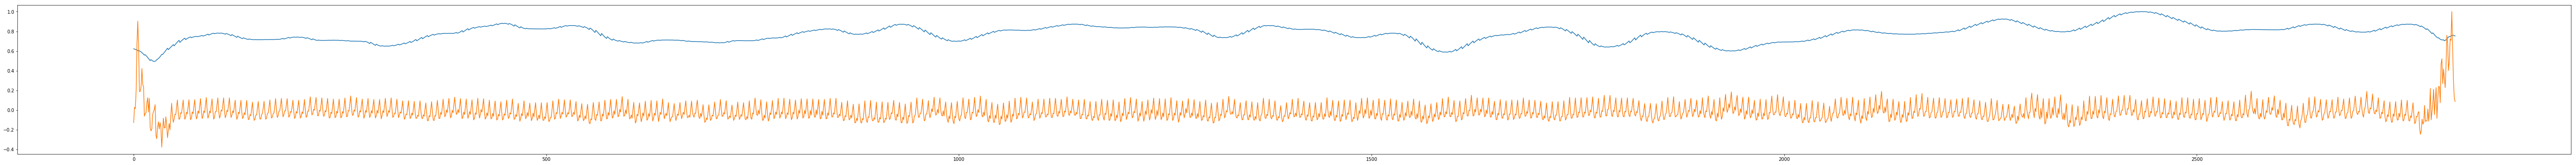

In [290]:
plt.figure(figsize = (100,6))
plt.plot(trues2[:,1]/(np.max(np.abs(trues2[:,1]))))
plt.plot(preds2[:,1]/(np.max(np.abs(preds2[:,1]))))